In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
digits = datasets.load_digits()
features = digits.data
target = digits.target
standardizer = StandardScaler()
logit = LogisticRegression()

pipeline = make_pipeline(standardizer, logit)
kf = KFold(n_splits=10, shuffle=True, random_state=1)

cv_results = cross_val_score(pipeline,
                            features,
                            target,
                            cv=kf,
                            scoring='accuracy', # loss function                            
                            n_jobs=-1) # use all cpu scores

cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

In [3]:
cv_results.mean()

0.9693916821849783

In [4]:
# baseline regression

from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

boston = load_boston()

features, target = boston.data, boston.target

features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=0)

dummy = DummyRegressor(strategy='mean')

dummy.fit(features_train, target_train)

# get r-squared score
dummy.score(features_test, target_test)

-0.001119359203955339

In [5]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(features_train, target_train)

ols.score(features_test, target_test)

0.635463843320211

In [6]:
clf = DummyRegressor(strategy='constant', constant=20)
clf.fit(features_train, target_train)

clf.score(features_test, target_test)

-0.06510502029325727

In [8]:
#baseline classifier
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier

iris = load_iris()
features, target = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
    features, target, random_state=0)

dummy = DummyClassifier(strategy='uniform', random_state=1)

dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.42105263157894735

In [9]:
# compare randomforest to baseline
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

classifier.fit(X_train, y_train)

classifier.score(X_test, y_test)

0.9736842105263158

In [10]:
# evaluating binary classifier predictions

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

#generate features metric and target vector
X, y = make_classification(n_samples=10000,
                          n_features=3,
                          n_informative=3,
                          n_redundant=0,
                          n_classes=2,
                          random_state=1)

logit = LogisticRegression()

cross_val_score(logit, X, y, scoring='accuracy')

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [11]:
cross_val_score(logit, X, y, scoring='precision')

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

In [13]:
cross_val_score(logit, X, y, scoring='recall')

array([0.951, 0.952, 0.953, 0.949, 0.951])

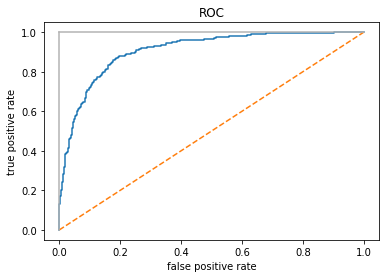

In [14]:
# evaluating binary classifier thresholds
# ROC-AUC

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

features, target = make_classification(n_samples=10000,
                                      n_features=10,
                                      n_classes=2,
                                      n_informative=3,
                                      random_state=3)

X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                   test_size=0.1, random_state=1)

logit = LogisticRegression()

logit.fit(X_train, y_train)

target_probas = logit.predict_proba(X_test)[:, 1]

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,
                                                              target_probas)

plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls='--')
plt.plot([0, 0], [1, 0], c='.7'), plt.plot([1,1,], c='.7')
plt.ylabel('true positive rate')
plt.xlabel('false positive rate')
plt.show()

In [16]:
logit.predict_proba(X_test)[0:5]

array([[0.86891533, 0.13108467],
       [0.46315541, 0.53684459],
       [0.03395355, 0.96604645],
       [0.39609783, 0.60390217],
       [0.66670611, 0.33329389]])

In [17]:
logit.classes_

array([0, 1])

In [18]:
print('threshold', threshold[116])
print('tpr', true_positive_rate[116])
print('fpr', false_positive_rate[116])

threshold 0.5331715230155316
tpr 0.810204081632653
fpr 0.14901960784313725


In [20]:
roc_auc_score(y_test, target_probas)

0.9073389355742297

/Users/mattmastin/.pyenv/versions/3.8.1/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


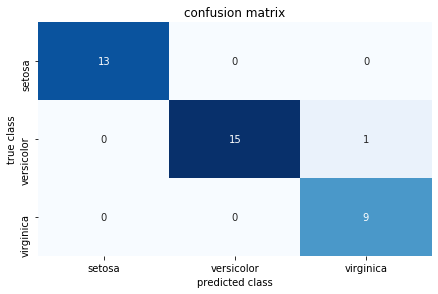

In [21]:
# evaluating multiclass classifier
# f1-macro score

# viz classifiers performance

import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

iris = datasets.load_iris()
features = iris.data
target = iris.target
class_names = iris.target_names
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=1)

classifier = LogisticRegression()

target_predicted = classifier.fit(features_train,
                                 target_train).predict(features_test)

matrix = confusion_matrix(target_test, target_predicted)

df = pd.DataFrame(matrix, index=class_names, columns=class_names)

sns.heatmap(df, annot=True, cbar=None, cmap='Blues')
plt.title('confusion matrix'), plt.tight_layout()
plt.ylabel('true class'), plt.xlabel('predicted class')
plt.show();

In [24]:
# evaluating regression - MSE
from sklearn.datasets import make_regression

features, target = make_regression(n_samples=100,
                                  n_features=3,
                                  n_informative=3,
                                  n_targets=1,
                                  noise=50,
                                  coef=False,
                                  random_state=1)

ols = LinearRegression()
cross_val_score(ols, features, target, scoring='neg_mean_squared_error')

array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

In [26]:
cross_val_score(ols, features, target, scoring='r2')

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

In [27]:
# evaluating clustering

import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

features, _ = make_blobs(n_samples=1000,
                        n_features=10,
                        centers=2,
                        cluster_std=0.5,
                        shuffle=True,
                        random_state=1)

model = KMeans(n_clusters=2, random_state=1).fit(features)

target_predicted = model.labels_

silhouette_score(features, target_predicted)

0.8916265564072142

In [29]:
# creating a custom evaluation metric

from sklearn.metrics import make_scorer, r2_score
from sklearn.linear_model import Ridge

features, target = make_regression(n_samples=100,
                                  n_features=3,
                                  random_state=1)

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.1, random_state=1)

def custom_metric(y_test, y_predicted):
    r2 = r2_score(y_test, y_predicted)
    return r2

score = make_scorer(custom_metric, greater_is_better=True)
classifier = Ridge()
model = classifier.fit(X_train, y_train)
score(model, X_test, y_test)

0.9997906102882058

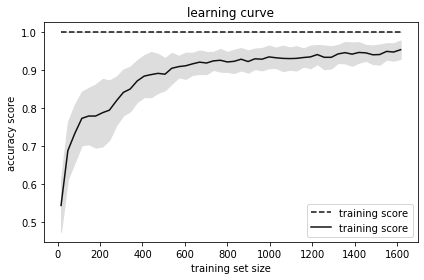

In [31]:

# visualizing the effect of training set size
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

digits = load_digits()

features, target = digits.data, digits.target

train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(), 
    features, 
    target,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.01, 1.0, 50))

# create means and std dev of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--', color='#111111', label='training score')
plt.plot(train_sizes, test_mean, color='#111111', label='training score')

# draw bands
plt.fill_between(train_sizes, train_mean - train_std, 
                train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std,
                test_mean + test_std, color='#DDDDDD')

plt.title('learning curve')
plt.xlabel('training set size'), plt.ylabel('accuracy score')
plt.legend(loc='best')
plt.tight_layout()
plt.show();

In [32]:
# text report of eval metrics

from sklearn.metrics import classification_report

features = iris.data
target = iris.target

class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(
    features, target, random_state=1)

classifier = LogisticRegression()
model = classifier.fit(X_train, y_train)
target_predicted = model.predict(X_test)

print(classification_report(y_test,
                           target_predicted,
                           target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



/Users/mattmastin/.pyenv/versions/3.8.1/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


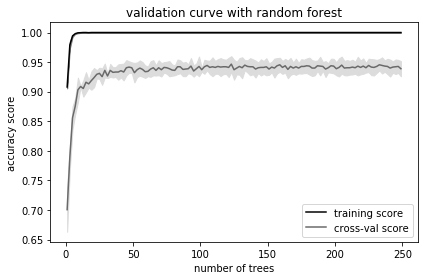

In [35]:
# visualizing effect of hyperparameter values

from sklearn.model_selection import validation_curve

features, target = digits.data, digits.target

param_range = (np.arange(1, 250, 2))

train_scores, test_scores = validation_curve(RandomForestClassifier(),
                                            features,
                                            target,
                                            param_name='n_estimators',
                                            param_range=param_range,
                                            cv=3,
                                            scoring='accuracy',
                                            n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, label='training score', color='black')
plt.plot(param_range, test_mean, label='cross-val score', color='dimgrey')

plt.fill_between(param_range, train_mean - train_std,
                train_mean + train_std, color='gray')
plt.fill_between(param_range, test_mean - test_std,
                test_mean + test_std, color='gainsboro')

plt.title('validation curve with random forest')
plt.xlabel('number of trees')
plt.ylabel('accuracy score')
plt.tight_layout()
plt.legend(loc='best')
plt.show();